In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm

### Data Overview

Calendar: price and availability for every day        
Listings: listing info e.g. name, locaiton, price, last_review, reviews per month, availability in a year       
Listings_gz: more detailed listing info e.g. host info, amenities, review scores, reviews per month         
Neighborhoods: neighborhoods' names in City of Los Angeles, other cities, or unincorporated areas         
Reviews: listing id & date for comments           
Reviewer_gz: detailed information of comments            

### Data Concatenation

In [2]:
cal_22Q4 = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/calendar.csv') # price and availabitlity for every day
cal_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/calendar.csv') 
cal_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/calendar.csv') # include 2024's data???
print(f'col check: t1 & t2: {list(cal_22Q4.columns) == list(cal_23Q1.columns)}, t2 & t3: {list(cal_23Q1.columns) == list(cal_23Q2.columns)}')
cal_22Q4['source']  = '2022Q4'
cal_23Q1['source']  = '2023Q1'
cal_23Q2['source']  = '2023Q2'
calendar = pd.concat([cal_22Q4, cal_23Q1, cal_23Q2], ignore_index=True)
calendar.head()

col check: t1 & t2: True, t2 & t3: True


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,source
0,109,2022-12-07,f,$115.00,$115.00,30.0,730.0,2022Q4
1,109,2022-12-08,f,$115.00,$115.00,30.0,730.0,2022Q4
2,109,2022-12-09,f,$115.00,$115.00,30.0,730.0,2022Q4
3,109,2022-12-10,f,$115.00,$115.00,30.0,730.0,2022Q4
4,109,2022-12-11,f,$115.00,$115.00,30.0,730.0,2022Q4


In [3]:
print(f'concat check: {cal_22Q4.shape[0] + cal_23Q1.shape[0] + cal_23Q2.shape[0]} == {calendar.shape[0]}')

concat check: 46478113 == 46478113


In [4]:
list_22Q4 = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/listings.csv')
list_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/listings.csv')
list_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/listings.csv')
list_23Q3 = pd.read_csv('LA_2022.10-2023.9/LA_2023.7-9/listings.csv')
print(f'col check: t1 & t2: {list(list_22Q4.columns) == list(list_23Q1.columns)}, t2 & t3: {list(list_23Q1.columns) == list(list_23Q2.columns)}, t3 & t4: {list(list_23Q2.columns) == list(list_23Q3.columns)}')
list_22Q4['source']  = '2022Q4'
list_23Q1['source']  = '2023Q1'
list_23Q2['source']  = '2023Q2'
list_23Q3['source']  = '2023Q3'
listings = pd.concat([list_22Q4, list_23Q1, list_23Q2, list_23Q3], ignore_index=True)
listings.head()

col check: t1 & t2: True, t2 & t3: True, t3 & t4: True


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,source
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN,2022Q4
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN,2022Q4
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN,2022Q4
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN,2022Q4
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN,2022Q4


In [5]:
print(f'concat check: {list_22Q4.shape[0] + list_23Q1.shape[0] + list_23Q2.shape[0] + list_23Q3.shape[0]} == {listings.shape[0]}')

concat check: 171947 == 171947


In [6]:
pd.set_option('display.max_columns', None)
list_gz_22Q4 = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/listings_gz.csv')
list_gz_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/listings_gz.csv')
list_gz_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/listings_gz.csv')
list_gz_23Q3 = pd.read_csv('LA_2022.10-2023.9/LA_2023.7-9/listings_gz.csv')
print(f'col check: t1 & t2: {list(list_gz_22Q4.columns) == list(list_gz_23Q1.columns)}, t2 & t3: {list(list_gz_23Q1.columns) == list(list_gz_23Q2.columns)}, t3 & t4: {list(list_gz_23Q2.columns) == list(list_gz_23Q3.columns)}')
list_gz_22Q4['source']  = '2022Q4'
list_gz_23Q1['source']  = '2023Q1'
list_gz_23Q2['source']  = '2023Q2'
list_gz_23Q3['source']  = '2023Q3'
listings_gz = pd.concat([list_gz_22Q4, list_gz_23Q1, list_gz_23Q2, list_gz_23Q3], ignore_index=True)
listings_gz.head() # more detailed info about listings: location, host info, availability, reviews, amenities

col check: t1 & t2: True, t2 & t3: True, t3 & t4: True


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,2022Q4,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,https://www.airbnb.com/users/show/61864,Olivier,2009-12-10,"Los Angeles, CA",Hello everyone and thank you for checking out ...,within a few hours,75%,86%,f,https://a0.muscache.com/im/users/61864/profile...,https://a0.muscache.com/im/users/61864/profile...,Culver City,6.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Culver City,Other Cities,34.02438,-118.38374,Private room in home,Private room,2,NaN,2 baths,1.0,1.0,"[""Wifi"", ""TV with standard cable"", ""Long term ...",$300.00,60,730,60.0,60.0,730.0,730.0,60.0,730.0,NaN,t,30,60,90,365,2022-12-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,2022Q4,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,https://www.airbnb.com/users/show/33861,Kevin,2009-08-25,"Los Angeles, CA",Los Angeles filmmaker and photographer,within a few hours,75%,38%,t,https://a0.muscache.com/im/pictures/user/bf309...,https://a0.muscache.com/im/pictures/user/bf309...,Hollywood Hills,1.0,2.0,"['email', 'phone']",t,t,"Los Angeles, California, United States",Hollywood Hills West,City of Los Angeles,34.10420,-118.34748,Private room in condo,Private room,1,NaN,1 shared bath,1.0,2.0,"[""TV with standard cable"", ""Hot water"", ""First...",$46.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,24,54,84,84,2022-12-07,95,4,0,2011-12-12,2022-08-11,4.82,4.80,4.76,4.89,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,2022Q4,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,https://www.airbnb.com/users/show/210344,Brenna,2010-08-23,"Culver City, CA","From LA, we like to travel, spend time outdoor...",within a day,94%,91%,t,https://a0.muscache.com/im/pictures/user/f7787...,https://a0.muscache.com/im/pictures/user/f7787...,Culver City,2.0,4.0,"['email', 'phone', 'work_email']",t,t,"Culver City, California, United States",Culver City,Other Cities,34.00985,-118.40798,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Free street parking"", ""Full kitchen""...",$140.00,3,365,1.0,3.0,365.0,365.0,3.0,365.0,NaN,t,5,10,22,254,2022-12-07,698,74,3,2011-01-02,2022-11-23,4.92,4.95,4.91

In [7]:
print(f'concat check: {list_gz_22Q4.shape[0] + list_gz_23Q1.shape[0] + list_gz_23Q2.shape[0] + list_gz_23Q3.shape[0]} == {listings_gz.shape[0]}')

concat check: 171947 == 171947


In [8]:
neigh = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/neighbourhoods.csv')
neigh_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/neighbourhoods.csv')
neigh_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/neighbourhoods.csv')
neigh_23Q3 = pd.read_csv('LA_2022.10-2023.9/LA_2023.7-9/neighbourhoods.csv')
print(f'dataframe check: t1 & t2: {neigh.equals(neigh_23Q1)}, t2 & t3: {neigh_23Q1.equals(neigh_23Q2)}, t3 & t4: {neigh_23Q2.equals(neigh_23Q3)}')
neigh.head() # ['City of Los Angeles', 'Other Cities', 'Unincorporated Areas']

dataframe check: t1 & t2: True, t2 & t3: True, t3 & t4: True


,neighbourhood_group,neighbourhood
0,City of Los Angeles,Adams-Normandie
1,City of Los Angeles,Arleta
2,City of Los Angeles,Arlington Heights
3,City of Los Angeles,Atwater Village
4,City of Los Angeles,Baldwin Hills/Crenshaw


In [9]:
# reviews are accumulated, some earlier reviews may not be included in later datasets because of listing removals
reviews_22Q4 = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/reviews.csv')
reviews_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/reviews.csv')
reviews_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/reviews.csv')
reviews_23Q3 = pd.read_csv('LA_2022.10-2023.9/LA_2023.7-9/reviews.csv')
print(f'col check: t1 & t2: {list(reviews_22Q4.columns) == list(reviews_23Q1.columns)}, t2 & t3: {list(reviews_23Q1.columns) == list(reviews_23Q2.columns)}, t3 & t4: {list(reviews_23Q2.columns) == list(reviews_23Q3.columns)}')
reviews_22Q4['source']  = '2022Q4'
reviews_23Q1['source']  = '2023Q1'
reviews_23Q2['source']  = '2023Q2'
reviews_23Q3['source']  = '2023Q3'
reviews = pd.concat([reviews_22Q4, reviews_23Q1, reviews_23Q2, reviews_23Q3], ignore_index=True)
reviews.head()

col check: t1 & t2: True, t2 & t3: True, t3 & t4: True


,listing_id,date,source
0,109,2011-08-15,2022Q4
1,67089,2011-01-02,2022Q4
2,67089,2011-01-22,2022Q4
3,67089,2011-04-05,2022Q4
4,67089,2011-04-24,2022Q4


In [10]:
# 769860828745617228	2022-11-29
print(reviews_23Q1[(reviews_23Q1['listing_id'] == 769860828745617228) & (reviews_23Q1['date'] == '2022-11-29')])
print(reviews_22Q4[(reviews_22Q4['listing_id'] == 769860828745617228) & (reviews_22Q4['date'] == '2022-11-29')])
listings[listings['id'] == 769860828745617228]

Empty DataFrame
Columns: [listing_id, date, source]
Index: []
                 listing_id        date  source
1357176  769860828745617228  2022-11-29  2022Q4


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,source
39848,769860828745617228,JOYFuL CHIC 2BR for 7 @VeniceBeach walk 2 beach,34593209,Amazing Vacation,Unincorporated Areas,Marina del Rey,33.982209,-118.455818,Entire home/apt,186,1,1,2022-11-29,1.0,28,45,1,NaN,2022Q4


In [11]:
reviews_gz_22Q4 = pd.read_csv('LA_2022.10-2023.9/LA_2022.10-12/reviews_gz.csv')
reviews_gz_23Q1 = pd.read_csv('LA_2022.10-2023.9/LA_2023.1-3/reviews_gz.csv')
reviews_gz_23Q2 = pd.read_csv('LA_2022.10-2023.9/LA_2023.4-6/reviews_gz.csv')
reviews_gz_23Q3  = pd.read_csv('LA_2022.10-2023.9/LA_2023.7-9/reviews_gz.csv')
print(f'col check: t1 & t2: {list(reviews_gz_22Q4.columns) == list(reviews_gz_23Q1.columns)}, t2 & t3: {list(reviews_gz_23Q1.columns) == list(reviews_gz_23Q2.columns)}, t3 & t4: {list(reviews_gz_23Q2.columns) == list(reviews_gz_23Q3.columns)}')
reviews_gz_22Q4['source']  = '2022Q4'
reviews_gz_23Q1['source']  = '2023Q1'
reviews_gz_23Q2['source']  = '2023Q2'
reviews_gz_23Q3['source']  = '2023Q3'
reviews_gz = pd.concat([reviews_gz_22Q4, reviews_gz_23Q1, reviews_gz_23Q2, reviews_gz_23Q3], ignore_index=True)
reviews_gz.head()

col check: t1 & t2: True, t2 & t3: True, t3 & t4: True


,listing_id,id,date,reviewer_id,reviewer_name,comments,source
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,2022Q4
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,2022Q4
2,206662,780773,2011-12-12,1465676,Orlando,"Kevin is great Host, the apartment is clean an...",2022Q4
3,206662,791960,2011-12-18,1465676,Orlando,"Excellent Host and excellent place, clean and ...",2022Q4
4,206662,932852,2012-02-20,1559443,Nadine,I had a wonderful stay here and felt at home. ...,2022Q4


In [12]:
print(f'Calendar:')
calendar.head()

Calendar:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,source
0,109,2022-12-07,f,$115.00,$115.00,30.0,730.0,2022Q4
1,109,2022-12-08,f,$115.00,$115.00,30.0,730.0,2022Q4
2,109,2022-12-09,f,$115.00,$115.00,30.0,730.0,2022Q4
3,109,2022-12-10,f,$115.00,$115.00,30.0,730.0,2022Q4
4,109,2022-12-11,f,$115.00,$115.00,30.0,730.0,2022Q4


### Data View

In [13]:
print(f'Calendar:')
calendar.head()

Calendar:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,source
0,109,2022-12-07,f,$115.00,$115.00,30.0,730.0,2022Q4
1,109,2022-12-08,f,$115.00,$115.00,30.0,730.0,2022Q4
2,109,2022-12-09,f,$115.00,$115.00,30.0,730.0,2022Q4
3,109,2022-12-10,f,$115.00,$115.00,30.0,730.0,2022Q4
4,109,2022-12-11,f,$115.00,$115.00,30.0,730.0,2022Q4


In [14]:
print(f'Listings:')
listings.head()

Listings:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,source
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN,2022Q4
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN,2022Q4
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN,2022Q4
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN,2022Q4
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN,2022Q4


In [15]:
print(f'Listings gz:')
listings_gz.head()

Listings gz:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,2022Q4,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,https://www.airbnb.com/users/show/61864,Olivier,2009-12-10,"Los Angeles, CA",Hello everyone and thank you for checking out ...,within a few hours,75%,86%,f,https://a0.muscache.com/im/users/61864/profile...,https://a0.muscache.com/im/users/61864/profile...,Culver City,6.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Culver City,Other Cities,34.02438,-118.38374,Private room in home,Private room,2,NaN,2 baths,1.0,1.0,"[""Wifi"", ""TV with standard cable"", ""Long term ...",$300.00,60,730,60.0,60.0,730.0,730.0,60.0,730.0,NaN,t,30,60,90,365,2022-12-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,2022Q4,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,https://www.airbnb.com/users/show/33861,Kevin,2009-08-25,"Los Angeles, CA",Los Angeles filmmaker and photographer,within a few hours,75%,38%,t,https://a0.muscache.com/im/pictures/user/bf309...,https://a0.muscache.com/im/pictures/user/bf309...,Hollywood Hills,1.0,2.0,"['email', 'phone']",t,t,"Los Angeles, California, United States",Hollywood Hills West,City of Los Angeles,34.10420,-118.34748,Private room in condo,Private room,1,NaN,1 shared bath,1.0,2.0,"[""TV with standard cable"", ""Hot water"", ""First...",$46.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,24,54,84,84,2022-12-07,95,4,0,2011-12-12,2022-08-11,4.82,4.80,4.76,4.89,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,2022Q4,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,https://www.airbnb.com/users/show/210344,Brenna,2010-08-23,"Culver City, CA","From LA, we like to travel, spend time outdoor...",within a day,94%,91%,t,https://a0.muscache.com/im/pictures/user/f7787...,https://a0.muscache.com/im/pictures/user/f7787...,Culver City,2.0,4.0,"['email', 'phone', 'work_email']",t,t,"Culver City, California, United States",Culver City,Other Cities,34.00985,-118.40798,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Free street parking"", ""Full kitchen""...",$140.00,3,365,1.0,3.0,365.0,365.0,3.0,365.0,NaN,t,5,10,22,254,2022-12-07,698,74,3,2011-01-02,2022-11-23,4.92,4.95,4.91

In [16]:
print(f'reviews:')
reviews.head()

reviews:


,listing_id,date,source
0,109,2011-08-15,2022Q4
1,67089,2011-01-02,2022Q4
2,67089,2011-01-22,2022Q4
3,67089,2011-04-05,2022Q4
4,67089,2011-04-24,2022Q4


In [17]:
print(f'Reviews gz:')
reviews_gz.head()

Reviews gz:


,listing_id,id,date,reviewer_id,reviewer_name,comments,source
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,2022Q4
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,2022Q4
2,206662,780773,2011-12-12,1465676,Orlando,"Kevin is great Host, the apartment is clean an...",2022Q4
3,206662,791960,2011-12-18,1465676,Orlando,"Excellent Host and excellent place, clean and ...",2022Q4
4,206662,932852,2012-02-20,1559443,Nadine,I had a wonderful stay here and felt at home. ...,2022Q4


In [18]:
print('calendar\n',calendar.columns)
print('listings\n',listings.columns)
print('listings_gz\n',listings_gz.columns)
print('neigh\n',neigh.columns)
print('reviews\n',reviews.columns)
print('reviews_gz\n',reviews_gz.columns)

calendar
 Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'source'],
      dtype='object')
listings
 Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'source'],
      dtype='object')
listings_gz
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_

### 1. Total Number of Listings

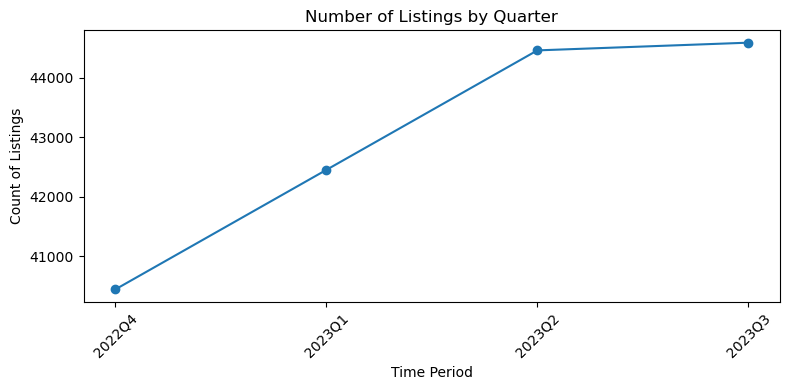

In [19]:
# Group by source and count listings
total_listings = listings.groupby('source').size()

# Plot
plt.figure(figsize=(8, 4))
plt.plot(total_listings.index, total_listings.values, marker='o')
plt.title("Number of Listings by Quarter")
plt.xlabel("Time Period")
plt.ylabel("Count of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
total_listings

source
2022Q4    40438
2023Q1    42451
2023Q2    44464
2023Q3    44594
dtype: int64

#### (A) Total number of listings across room type

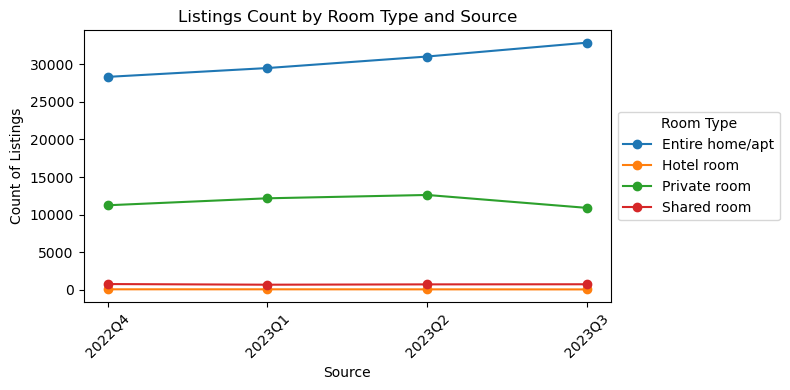

In [21]:
# Group data
grouped = listings.groupby(['room_type', 'source']).size().reset_index(name='count')

# Unique room types
room_types = grouped['room_type'].unique()

plt.figure(figsize=(8, 4))

# Plot each room type as a separate line
for rt in room_types:
    subset = grouped[grouped['room_type'] == rt]
    plt.plot(subset['source'], subset['count'], marker='o', label=rt)

plt.title("Listings Count by Room Type and Source")
plt.xlabel("Source")
plt.ylabel("Count of Listings")
plt.xticks(rotation=45)
plt.legend(title="Room Type", loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


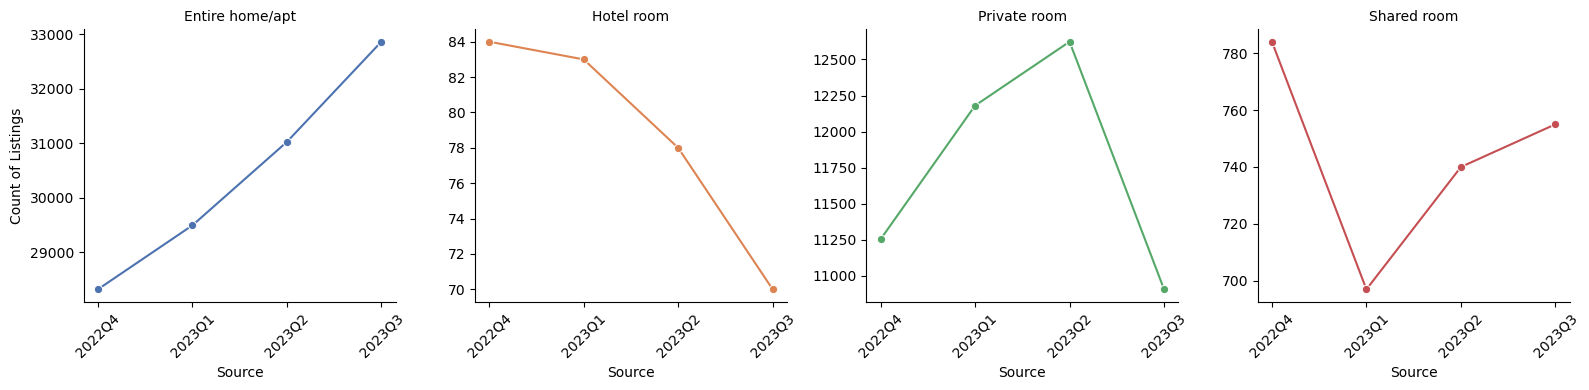

In [22]:
# Group data
grouped = listings.groupby(['room_type', 'source']).size().reset_index(name='count')

# Set a fixed color palette
color_map = {
    'Entire home/apt': '#4C72B0',  # blue
    'Hotel room': '#DD8452',       # orange
    'Private room': '#55A868',     # green
    'Shared room': '#C44E52'       # red
}

# FacetGrid with fixed palette
g = sns.FacetGrid(
    grouped, 
    col="room_type", 
    col_wrap=4, 
    sharey=False, 
    height=4,
    hue="room_type",
    palette=color_map
)

g.map(sns.lineplot, "source", "count", marker="o")

# Formatting
g.set_titles("{col_name}")
g.set_axis_labels("Source", "Count of Listings")

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### (B) Percentage change of listings across room types

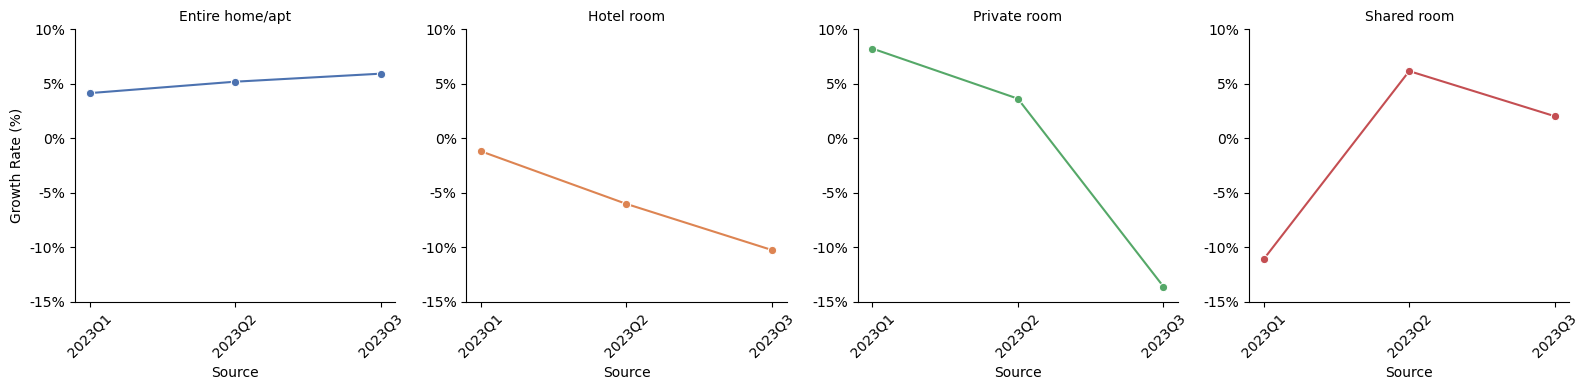

In [23]:
# Group & sort
grouped = listings.groupby(['room_type', 'source']).size().reset_index(name='count')
grouped = grouped.sort_values(['room_type', 'source'])

# % change
grouped['pct_change'] = grouped.groupby('room_type')['count'].pct_change()

# Color map
color_map = {
    'Entire home/apt': '#4C72B0',
    'Hotel room': '#DD8452',
    'Private room': '#55A868',
    'Shared room': '#C44E52'
}

# FacetGrid
g = sns.FacetGrid(
    grouped, 
    col="room_type", 
    col_wrap=4,
    sharey=False,    
    height=4,
    hue="room_type",
    palette=color_map
)

g.map(sns.lineplot, "source", "pct_change", marker="o")

g.set_titles("{col_name}")
g.set_axis_labels("Source", "Growth Rate (%)")

# percentage format with 5% ticks
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ymin, ymax = ax.get_ylim()
    tick_start = np.floor(ymin / 0.05) * 0.05
    tick_end   = np.ceil(ymax / 0.05)  * 0.05
    ticks = np.arange(-0.15, 0.15, 0.05)
    ax.set_yticks(ticks)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

plt.tight_layout()
plt.show()


### 2. Accommodation

In [24]:
listings_gz.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,2022Q4,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,https://www.airbnb.com/users/show/61864,Olivier,2009-12-10,"Los Angeles, CA",Hello everyone and thank you for checking out ...,within a few hours,75%,86%,f,https://a0.muscache.com/im/users/61864/profile...,https://a0.muscache.com/im/users/61864/profile...,Culver City,6.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Culver City,Other Cities,34.02438,-118.38374,Private room in home,Private room,2,NaN,2 baths,1.0,1.0,"[""Wifi"", ""TV with standard cable"", ""Long term ...",$300.00,60,730,60.0,60.0,730.0,730.0,60.0,730.0,NaN,t,30,60,90,365,2022-12-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,2022Q4,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,https://www.airbnb.com/users/show/33861,Kevin,2009-08-25,"Los Angeles, CA",Los Angeles filmmaker and photographer,within a few hours,75%,38%,t,https://a0.muscache.com/im/pictures/user/bf309...,https://a0.muscache.com/im/pictures/user/bf309...,Hollywood Hills,1.0,2.0,"['email', 'phone']",t,t,"Los Angeles, California, United States",Hollywood Hills West,City of Los Angeles,34.10420,-118.34748,Private room in condo,Private room,1,NaN,1 shared bath,1.0,2.0,"[""TV with standard cable"", ""Hot water"", ""First...",$46.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,24,54,84,84,2022-12-07,95,4,0,2011-12-12,2022-08-11,4.82,4.80,4.76,4.89,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,2022Q4,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,https://www.airbnb.com/users/show/210344,Brenna,2010-08-23,"Culver City, CA","From LA, we like to travel, spend time outdoor...",within a day,94%,91%,t,https://a0.muscache.com/im/pictures/user/f7787...,https://a0.muscache.com/im/pictures/user/f7787...,Culver City,2.0,4.0,"['email', 'phone', 'work_email']",t,t,"Culver City, California, United States",Culver City,Other Cities,34.00985,-118.40798,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Free street parking"", ""Full kitchen""...",$140.00,3,365,1.0,3.0,365.0,365.0,3.0,365.0,NaN,t,5,10,22,254,2022-12-07,698,74,3,2011-01-02,2022-11-23,4.92,4.95,4.91

/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_24309/1205005982.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc = listings_gz.groupby(['acc_group', 'source']).size().reset_index(name='count')


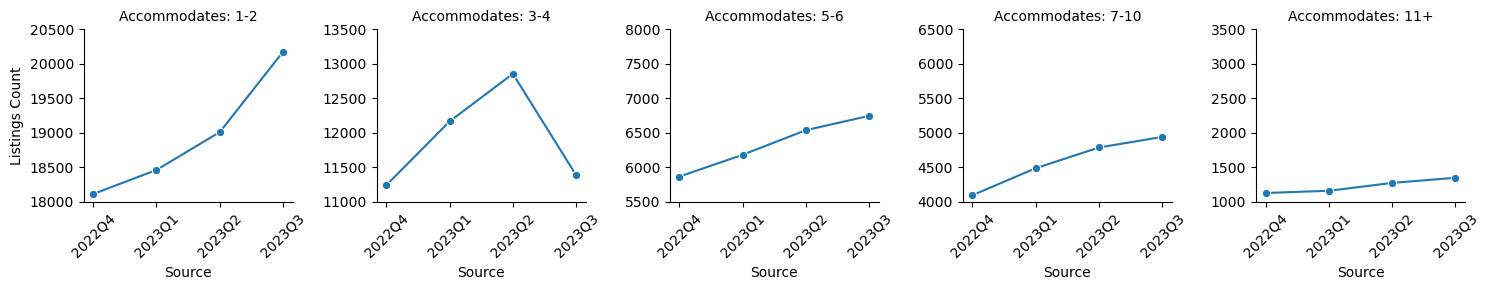

In [25]:
# Categorize accommodates
def categorize_accommodates(x):
    if x <= 2:
        return "1-2"
    elif x <= 4:
        return "3-4"
    elif x <= 6:
        return "5-6"
    elif x <= 10:
        return "7-10"
    else:
        return "11+"

listings_gz["acc_group"] = listings_gz["accommodates"].apply(categorize_accommodates)
order = ["1-2", "3-4", "5-6", "7-10", "11+"]
listings_gz["acc_group"] = pd.Categorical(listings_gz["acc_group"], categories=order, ordered=True)

# Group data
acc = listings_gz.groupby(['acc_group', 'source']).size().reset_index(name='count')

# FacetGrid
g = sns.FacetGrid(acc, col="acc_group", col_wrap=5, sharey=False, height=3)
g.map(sns.lineplot, "source", "count", marker="o")

g.set_titles("Accommodates: {col_name}")
g.set_axis_labels("Source", "Listings Count")

# Set y-ticks for each subplot
for ax in g.axes.flat:
    ymin, ymax = ax.get_ylim()
    ticks = np.arange(int(ymin // 500 * 500), int(ymin + 2500), 500)
    ax.set_yticks(ticks)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 3. Location

In [26]:
listings_gz.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,acc_group
0,65467,https://www.airbnb.com/rooms/65467,20221206172243,2022-12-07,2022Q4,A Luxury Home in Los Angeles,<b>The space</b><br />Private 16 x 15 ft room ...,NaN,https://a0.muscache.com/pictures/821696/64d8a6...,61864,https://www.airbnb.com/users/show/61864,Olivier,2009-12-10,"Los Angeles, CA",Hello everyone and thank you for checking out ...,within a few hours,75%,86%,f,https://a0.muscache.com/im/users/61864/profile...,https://a0.muscache.com/im/users/61864/profile...,Culver City,6.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Culver City,Other Cities,34.02438,-118.38374,Private room in home,Private room,2,NaN,2 baths,1.0,1.0,"[""Wifi"", ""TV with standard cable"", ""Long term ...",$300.00,60,730,60.0,60.0,730.0,730.0,60.0,730.0,NaN,t,30,60,90,365,2022-12-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN,1-2
1,206662,https://www.airbnb.com/rooms/206662,20221206172243,2022-12-07,2022Q4,"Hollywood & Hiking, 30 day minimum","Semi-Private, vaccinated only, you will be sta...",The quietest part of Hollywood yet still walka...,https://a0.muscache.com/pictures/30274679/5011...,33861,https://www.airbnb.com/users/show/33861,Kevin,2009-08-25,"Los Angeles, CA",Los Angeles filmmaker and photographer,within a few hours,75%,38%,t,https://a0.muscache.com/im/pictures/user/bf309...,https://a0.muscache.com/im/pictures/user/bf309...,Hollywood Hills,1.0,2.0,"['email', 'phone']",t,t,"Los Angeles, California, United States",Hollywood Hills West,City of Los Angeles,34.10420,-118.34748,Private room in condo,Private room,1,NaN,1 shared bath,1.0,2.0,"[""TV with standard cable"", ""Hot water"", ""First...",$46.00,30,30,30.0,30.0,30.0,30.0,30.0,30.0,NaN,t,24,54,84,84,2022-12-07,95,4,0,2011-12-12,2022-08-11,4.82,4.80,4.76,4.89,4.92,4.92,4.87,NaN,f,1,0,1,0,0.71,1-2
2,67089,https://www.airbnb.com/rooms/67089,20221206172243,2022-12-07,2022Q4,Tranquil Guesthouse Oasis with a Hot Tub,Relax in a hammock or hot tub in a secluded ba...,The bungalow sits behind the main house down t...,https://a0.muscache.com/pictures/87cd0874-9acc...,210344,https://www.airbnb.com/users/show/210344,Brenna,2010-08-23,"Culver City, CA","From LA, we like to travel, spend time outdoor...",within a day,94%,91%,t,https://a0.muscache.com/im/pictures/user/f7787...,https://a0.muscache.com/im/pictures/user/f7787...,Culver City,2.0,4.0,"['email', 'phone', 'work_email']",t,t,"Culver City, California, United States",Culver City,Other Cities,34.00985,-118.40798,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Free street parking"", ""Full kitchen""...",$140.00,3,365,1.0,3.0,365.0,365.0,3.0,365.0,NaN,t,5,10,22,254,2022-12-07,698,74,3,2011-01-02,2022-11

In [27]:
listings_gz.groupby(['source', 'neighbourhood_cleansed']).size().reset_index(name='count').sort_values('count', ascending=False).head()

,source,neighbourhood_cleansed,count
728,2023Q2,Sherman Oaks,2533
463,2023Q1,Sherman Oaks,2205
897,2023Q3,Hollywood,1767
632,2023Q2,Hollywood,1754
927,2023Q3,Long Beach,1721


In [28]:
listings_gz[listings_gz['source'] == '2022Q4'].groupby(['source', 'neighbourhood_cleansed']).size().reset_index(name='count').head()

,source,neighbourhood_cleansed,count
0,2022Q4,Acton,12
1,2022Q4,Adams-Normandie,34
2,2022Q4,Agoura Hills,51
3,2022Q4,Agua Dulce,28
4,2022Q4,Alhambra,456


#### (A) Number of listings in each neighborhood (by quarter)

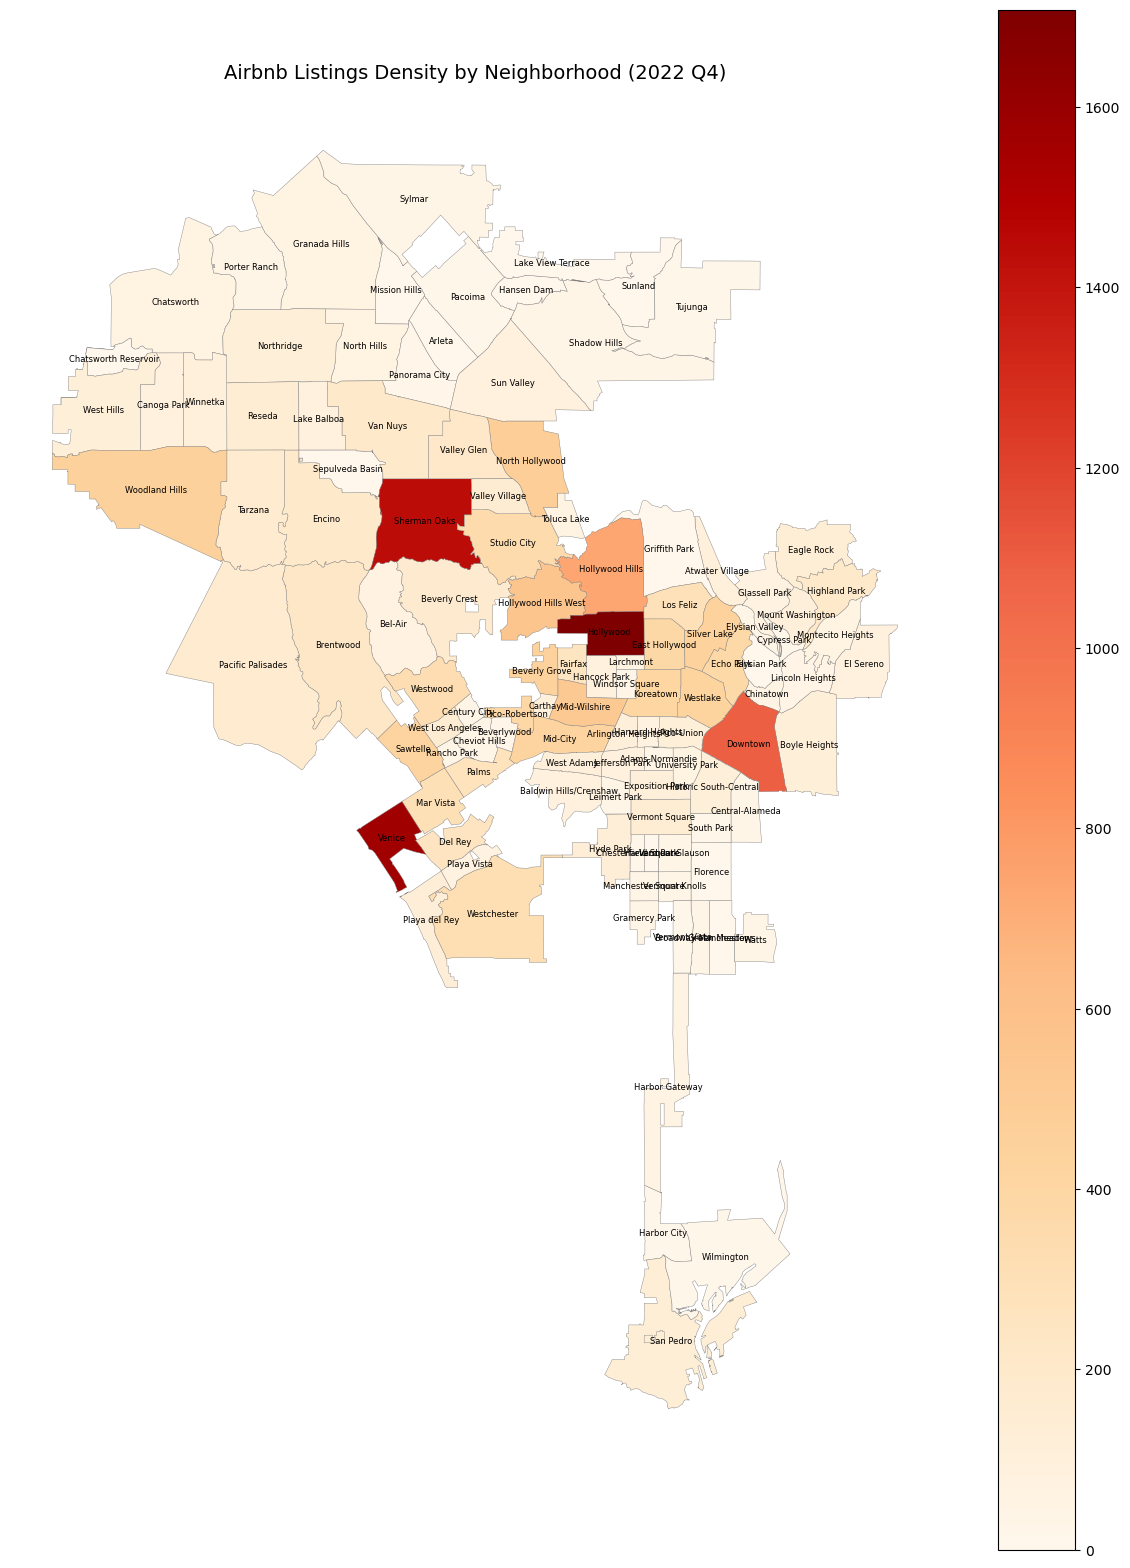

In [29]:
q422 = listings_gz[listings_gz['source'] == '2022Q4']

neigh_counts = (
    q422.groupby("neighbourhood_cleansed")
        .size()
        .reset_index(name="count")
)
neigh_counts = neigh_counts.rename(
    columns={"neighbourhood_cleansed": "name"}
)
neigh_geo = gpd.read_file("neighborhoods.geojson").to_crs(4326)
neigh_merged = neigh_geo.merge(neigh_counts, on="name", how="left")
neigh_merged["count"] = neigh_merged["count"].fillna(0)

fig, ax = plt.subplots(figsize=(15, 20))

neigh_merged.plot(
    ax=ax,
    column="count",
    cmap="OrRd",       
    linewidth=0.3,
    edgecolor="gray",
    legend=True
)
for idx, row in neigh_merged.iterrows():
    if row.geometry.is_empty:
        continue
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row["name"],
        fontsize=6,
        color="black",
        ha="center",
        va="center"
    )
ax.set_title("Airbnb Listings Density by Neighborhood (2022 Q4)", fontsize=14)
ax.axis("off")

plt.show()



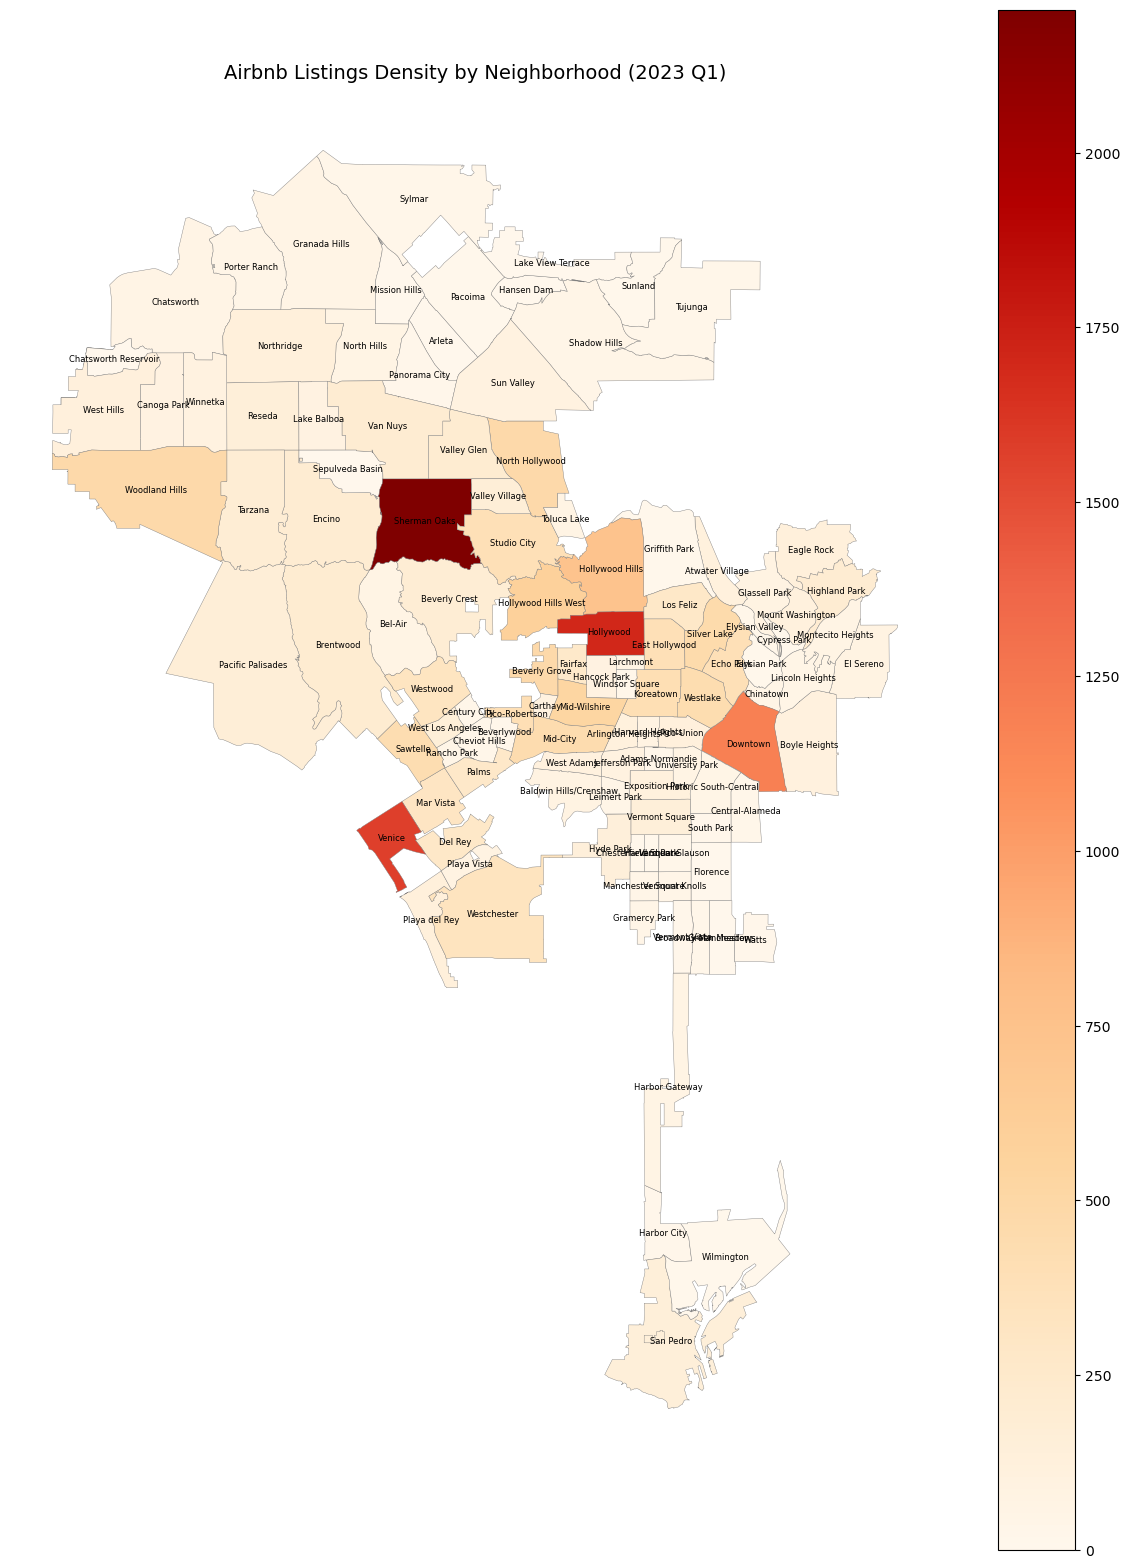

In [30]:
q123 = listings_gz[listings_gz['source'] == '2023Q1']

neigh_counts = (
    q123.groupby("neighbourhood_cleansed")
        .size()
        .reset_index(name="count")
)
neigh_counts = neigh_counts.rename(
    columns={"neighbourhood_cleansed": "name"}
)
neigh_geo = gpd.read_file("neighborhoods.geojson").to_crs(4326)
neigh_merged = neigh_geo.merge(neigh_counts, on="name", how="left")
neigh_merged["count"] = neigh_merged["count"].fillna(0)

fig, ax = plt.subplots(figsize=(15, 20))

neigh_merged.plot(
    ax=ax,
    column="count",
    cmap="OrRd",    
    linewidth=0.3,
    edgecolor="gray",
    legend=True
)
# --- Step 5: Add neighborhood names ---
for idx, row in neigh_merged.iterrows():
    if row.geometry.is_empty:
        continue
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row["name"],
        fontsize=6,
        color="black",
        ha="center",
        va="center"
    )

ax.set_title("Airbnb Listings Density by Neighborhood (2023 Q1)", fontsize=14)
ax.axis("off")

plt.show()



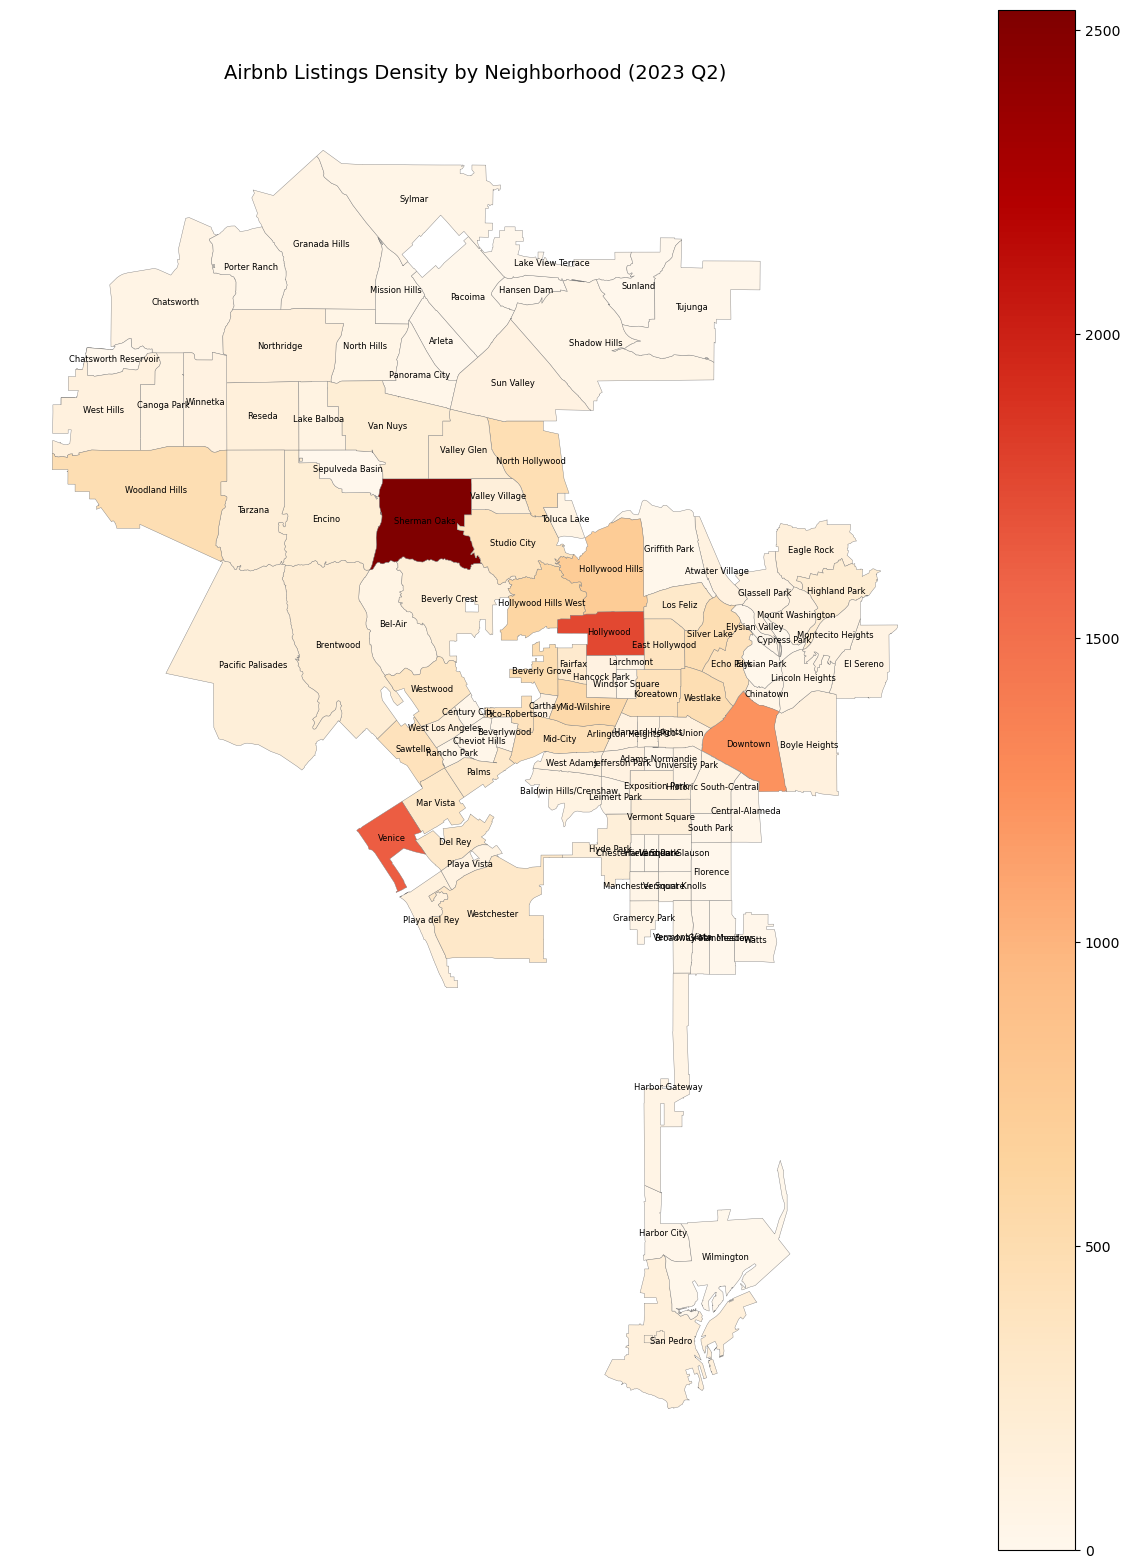

In [31]:
q223 = listings_gz[listings_gz['source'] == '2023Q2']

neigh_counts = (
    q223.groupby("neighbourhood_cleansed")
        .size()
        .reset_index(name="count")
)
neigh_counts = neigh_counts.rename(
    columns={"neighbourhood_cleansed": "name"}
)
neigh_geo = gpd.read_file("neighborhoods.geojson").to_crs(4326)
neigh_merged = neigh_geo.merge(neigh_counts, on="name", how="left")
neigh_merged["count"] = neigh_merged["count"].fillna(0)

fig, ax = plt.subplots(figsize=(15, 20))

neigh_merged.plot(
    ax=ax,
    column="count",
    cmap="OrRd",    
    linewidth=0.3,
    edgecolor="gray",
    legend=True
)
# --- Step 5: Add neighborhood names ---
for idx, row in neigh_merged.iterrows():
    if row.geometry.is_empty:
        continue
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row["name"],
        fontsize=6,
        color="black",
        ha="center",
        va="center"
    )

ax.set_title("Airbnb Listings Density by Neighborhood (2023 Q2)", fontsize=14)
ax.axis("off")

plt.show()



#### (B) Top 5 neighborhoods with the most listings

/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_24309/2128771951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1000x600 with 0 Axes>

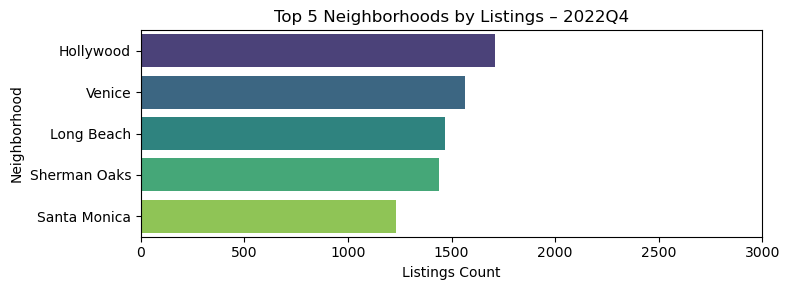

/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_24309/2128771951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


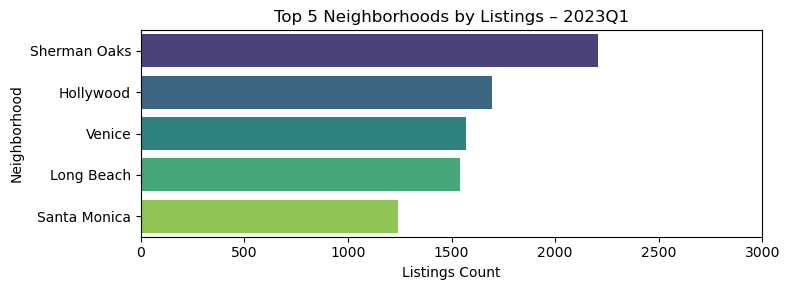

/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_24309/2128771951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


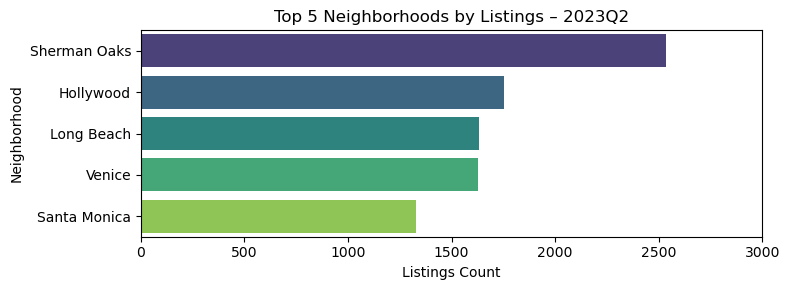

/var/folders/3x/l24krrq13yscf55fq7grlg9h0000gn/T/ipykernel_24309/2128771951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


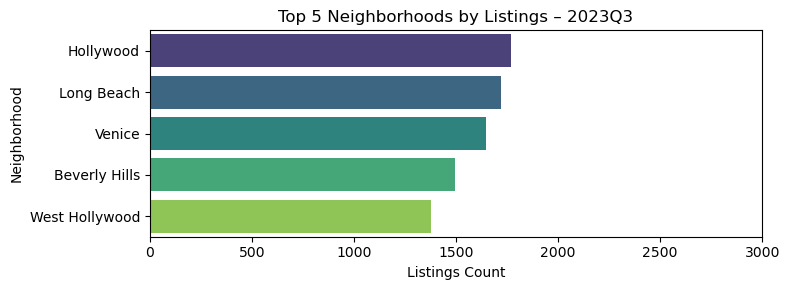

In [32]:
top5 = (
    listings_gz.groupby(['source', 'neighbourhood_cleansed'])
        .size()
        .reset_index(name='count')
        .sort_values(['source', 'count'], ascending=[True, False])
        .groupby('source')
        .head(5)
)

plt.figure(figsize=(10, 6))
sources = top5['source'].unique()

for s in sources:
    subset = top5[top5['source'] == s]

    plt.figure(figsize=(8, 3))
    sns.barplot(
        data=subset,
        x="count",
        y="neighbourhood_cleansed",
        palette="viridis"
    )
    plt.xlim(0, 3000)
    plt.title(f"Top 5 Neighborhoods by Listings – {s}")
    plt.xlabel("Listings Count")
    plt.ylabel("Neighborhood")
    plt.tight_layout()
    plt.show()



#### (C) Difference in number of listings between 2022Q4 and 2023Q3

In [33]:
# group data
df = listings_gz.groupby(['source','neighbourhood_cleansed']).size().reset_index(name='count')

# filter 2 quarters
df_filtered = df[df['source'].isin(['2022Q4', '2023Q3'])]

# pivot to wide format
pivot = df_filtered.pivot(
    index='neighbourhood_cleansed',
    columns='source',
    values='count'
).fillna(0)

# compute difference
pivot['diff'] = pivot['2023Q3'] - pivot['2022Q4']

# reset index
pivot = pivot.reset_index()

# rename columns
pivot = pivot.rename(columns={
    'neighbourhood_cleansed': 'name',
})


pivot.head()


source,name,2022Q4,2023Q3,diff
0,Acton,12.0,14.0,2.0
1,Adams-Normandie,34.0,41.0,7.0
2,Agoura Hills,51.0,62.0,11.0
3,Agua Dulce,28.0,17.0,-11.0
4,Alhambra,456.0,524.0,68.0


In [34]:
pivot.sort_values('diff', ascending=True).head()

source,name,2022Q4,2023Q3,diff
198,Sherman Oaks,1439.0,478.0,-961.0
101,Historic South-Central,124.0,74.0,-50.0
57,Diamond Bar,178.0,138.0,-40.0
6,Altadena,243.0,229.0,-14.0
82,Glendale,837.0,825.0,-12.0


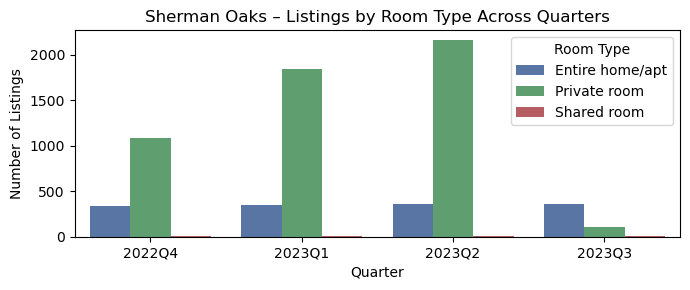

In [35]:
so_listings = listings_gz[listings_gz['neighbourhood_cleansed'] == 'Sherman Oaks'].groupby(['source', 'room_type']).size().reset_index(name='count')
color_map = {
    "Entire home/apt": "#4C72B0",  # blue
    "Hotel room": "#DD8452",       # orange
    "Private room": "#55A868",     # green
    "Shared room": "#C44E52"       # red
}

color_map = {
    "Entire home/apt": "#4C72B0",  # blue
    "Hotel room": "#DD8452",       # orange
    "Private room": "#55A868",     # green
    "Shared room": "#C44E52"       # red
}

plt.figure(figsize=(7, 3))

sns.barplot(
    data=so_listings,
    x='source',
    y='count',
    hue='room_type',
    palette=color_map,
    hue_order=["Entire home/apt", "Private room", "Shared room"]
)

plt.title("Sherman Oaks – Listings by Room Type Across Quarters")
plt.xlabel("Quarter")
plt.ylabel("Number of Listings")
plt.legend(title="Room Type")

plt.tight_layout()
plt.show()

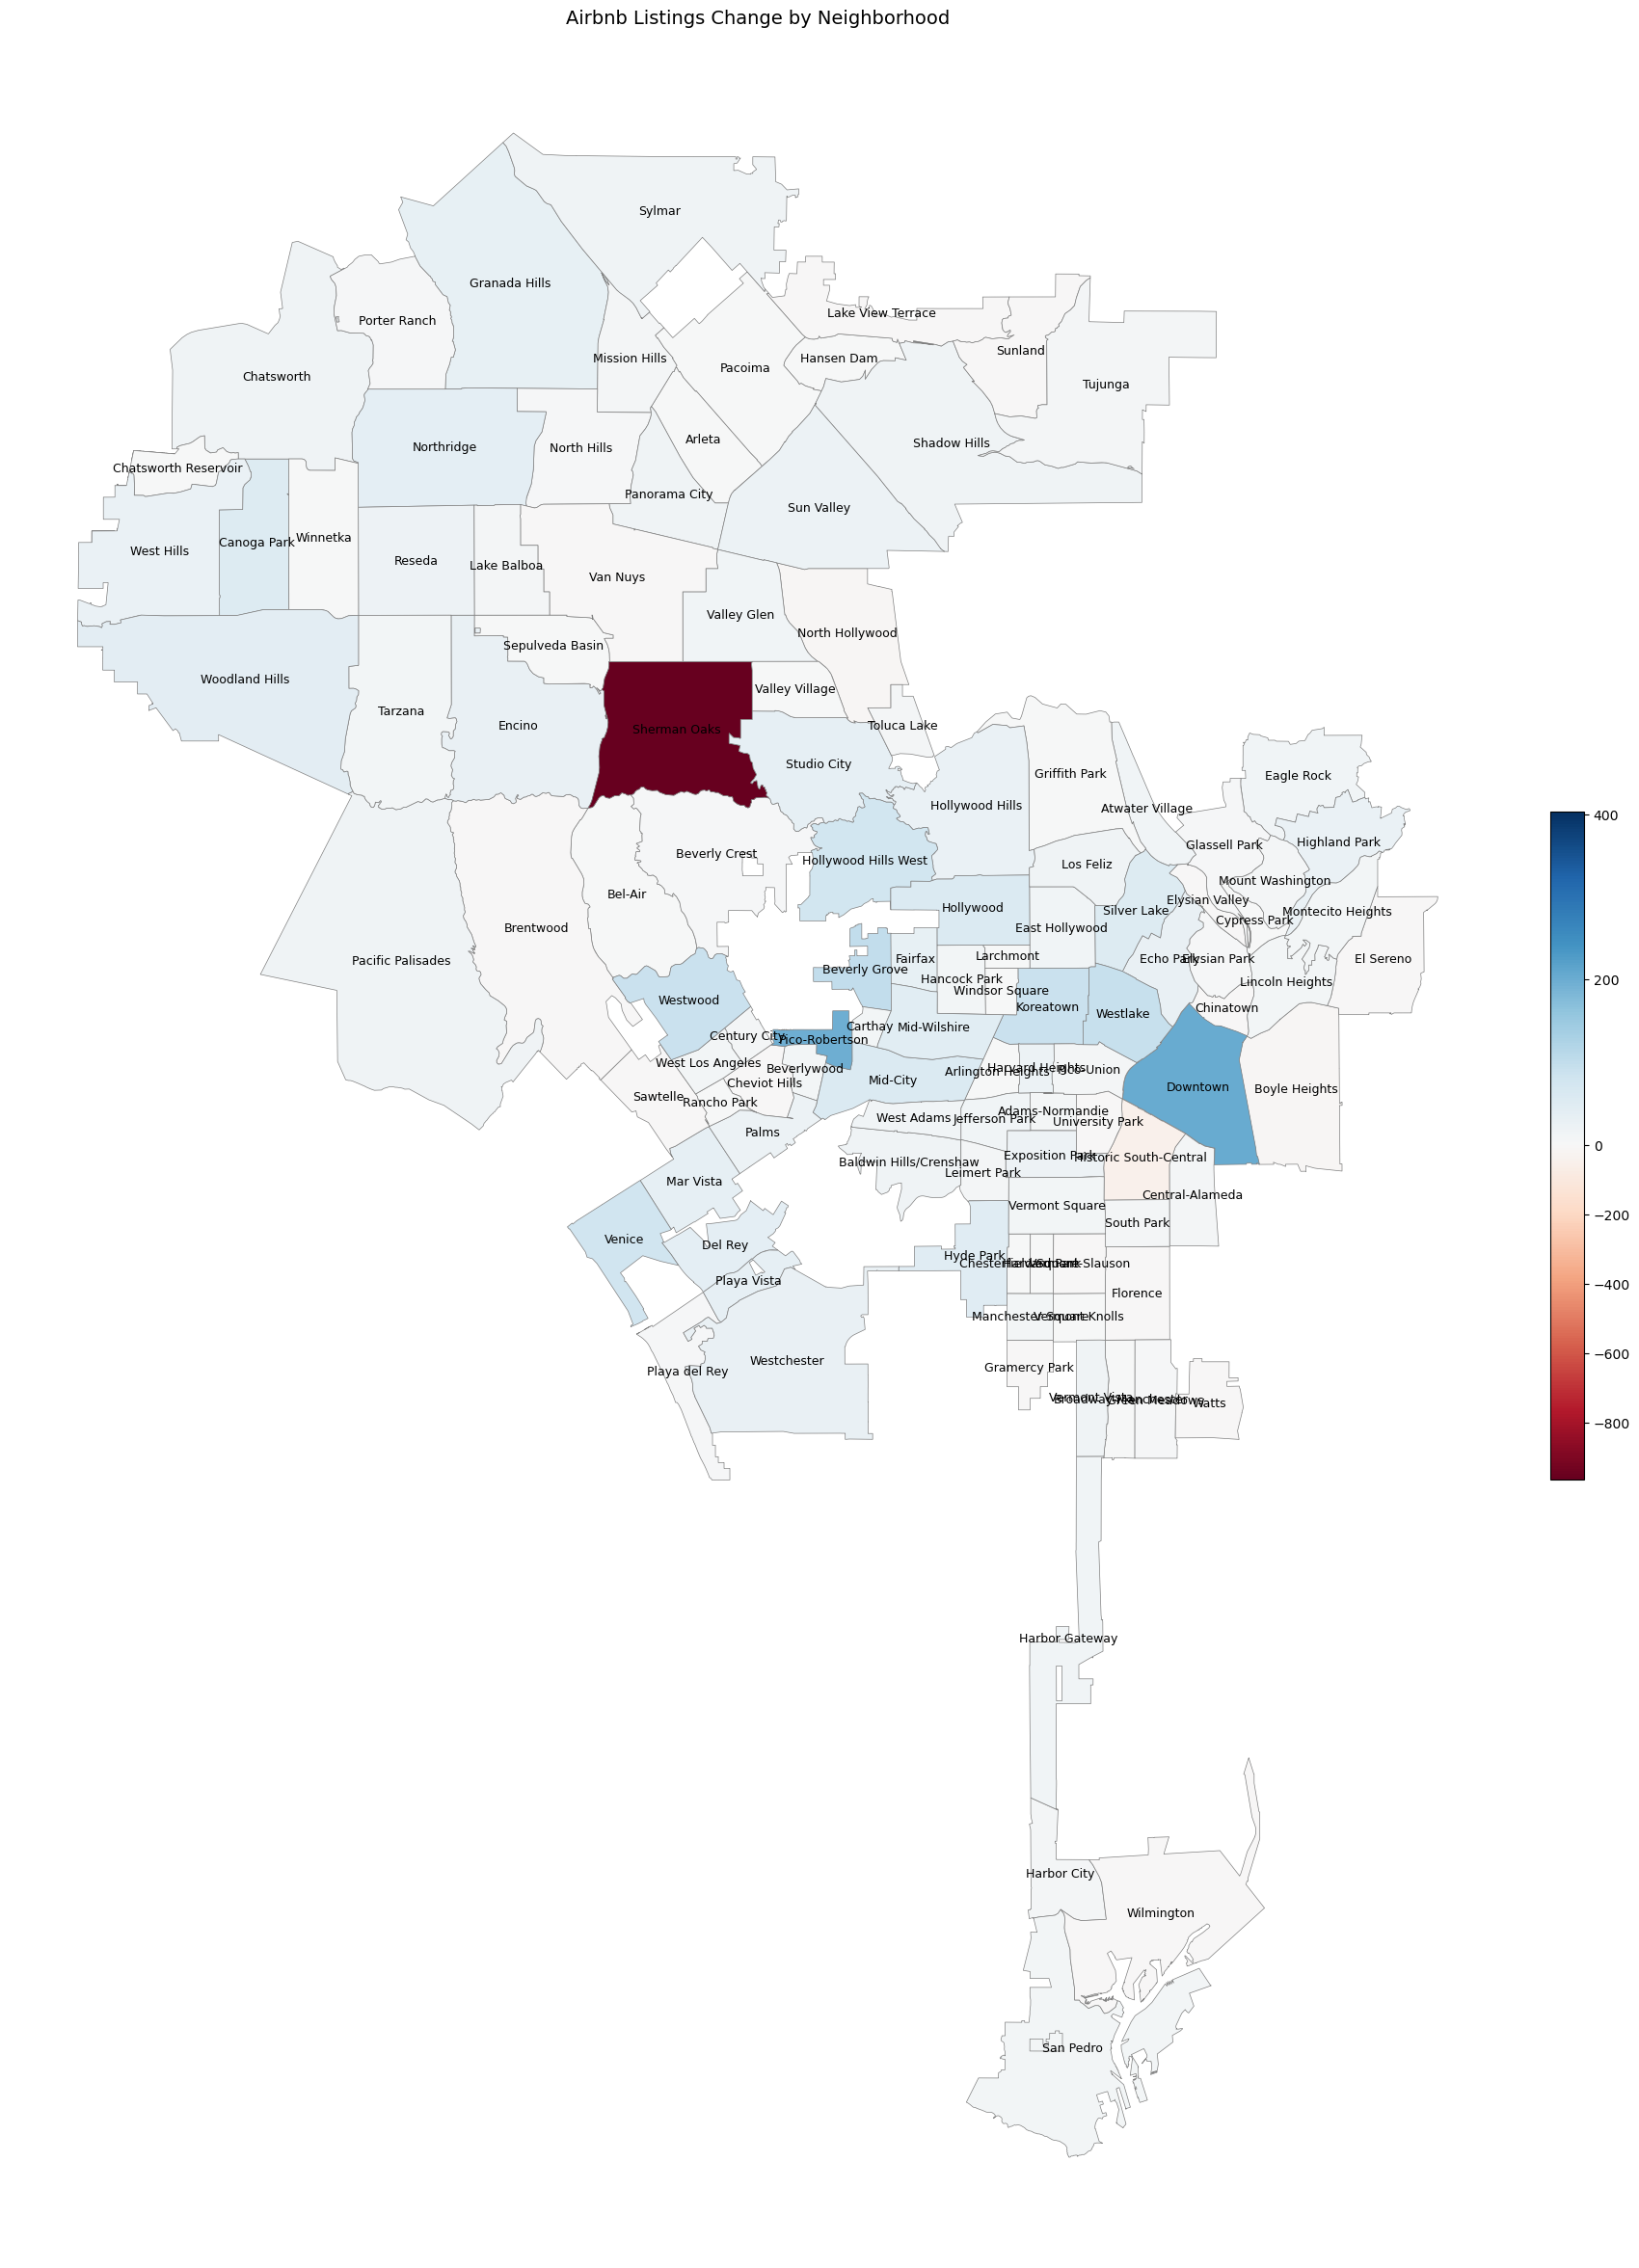

In [36]:
# load geojson
neigh_geo = gpd.read_file("neighborhoods.geojson").to_crs(4326)

# merge pivot table
neigh_diff = neigh_geo.merge(pivot, on='name', how='left')

# fill missing diff
neigh_diff['diff'] = neigh_diff['diff'].fillna(0)

# create color normalization centered at 0
norm = TwoSlopeNorm(vmin=neigh_diff['diff'].min(),
                    vcenter=0,
                    vmax=neigh_diff['diff'].max()*2)

# plot
fig, ax = plt.subplots(figsize=(30,30))

neigh_diff.plot(
    ax=ax,
    column='diff',
    cmap='RdBu',  
    norm=norm,       # ensures 0 = white
    linewidth=0.5,
    edgecolor='gray',
    legend_kwds={'label': 'Change in Listings (2023Q3 - 2022Q4)'}
)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap='RdBu'),
    ax=ax,
    fraction=0.03,
    pad=0.02,
    shrink=0.3   
)

ax.set_title("Airbnb Listings Change by Neighborhood", fontsize=14)
ax.axis("off")
for idx, row in neigh_diff.iterrows():
    geom = row.geometry
    if geom.is_empty:  
        continue

    centroid = geom.centroid
    x, y = centroid.x, centroid.y

    ax.text(
        x, y,
        row['name'],
        fontsize=9,      
        ha='center',
        va='center',
        color='black'
    )

plt.show()


In [37]:
nei_listings = listings_gz[listings_gz['source'] == '2023Q3'].groupby('neighbourhood_cleansed').size().reset_index(name='count').sort_values('count', ascending=False)
nei_listings.rename(columns={'neighbourhood_cleansed': 'name'}, inplace=True)



In [38]:
nei_listings.head(15)

,name,count
102,Hollywood,1767
132,Long Beach,1721
234,Venice,1647
25,Beverly Hills,1494
251,West Hollywood,1378
194,Santa Monica,1353
59,Downtown,1293
82,Glendale,825
103,Hollywood Hills,766
167,Pasadena,679


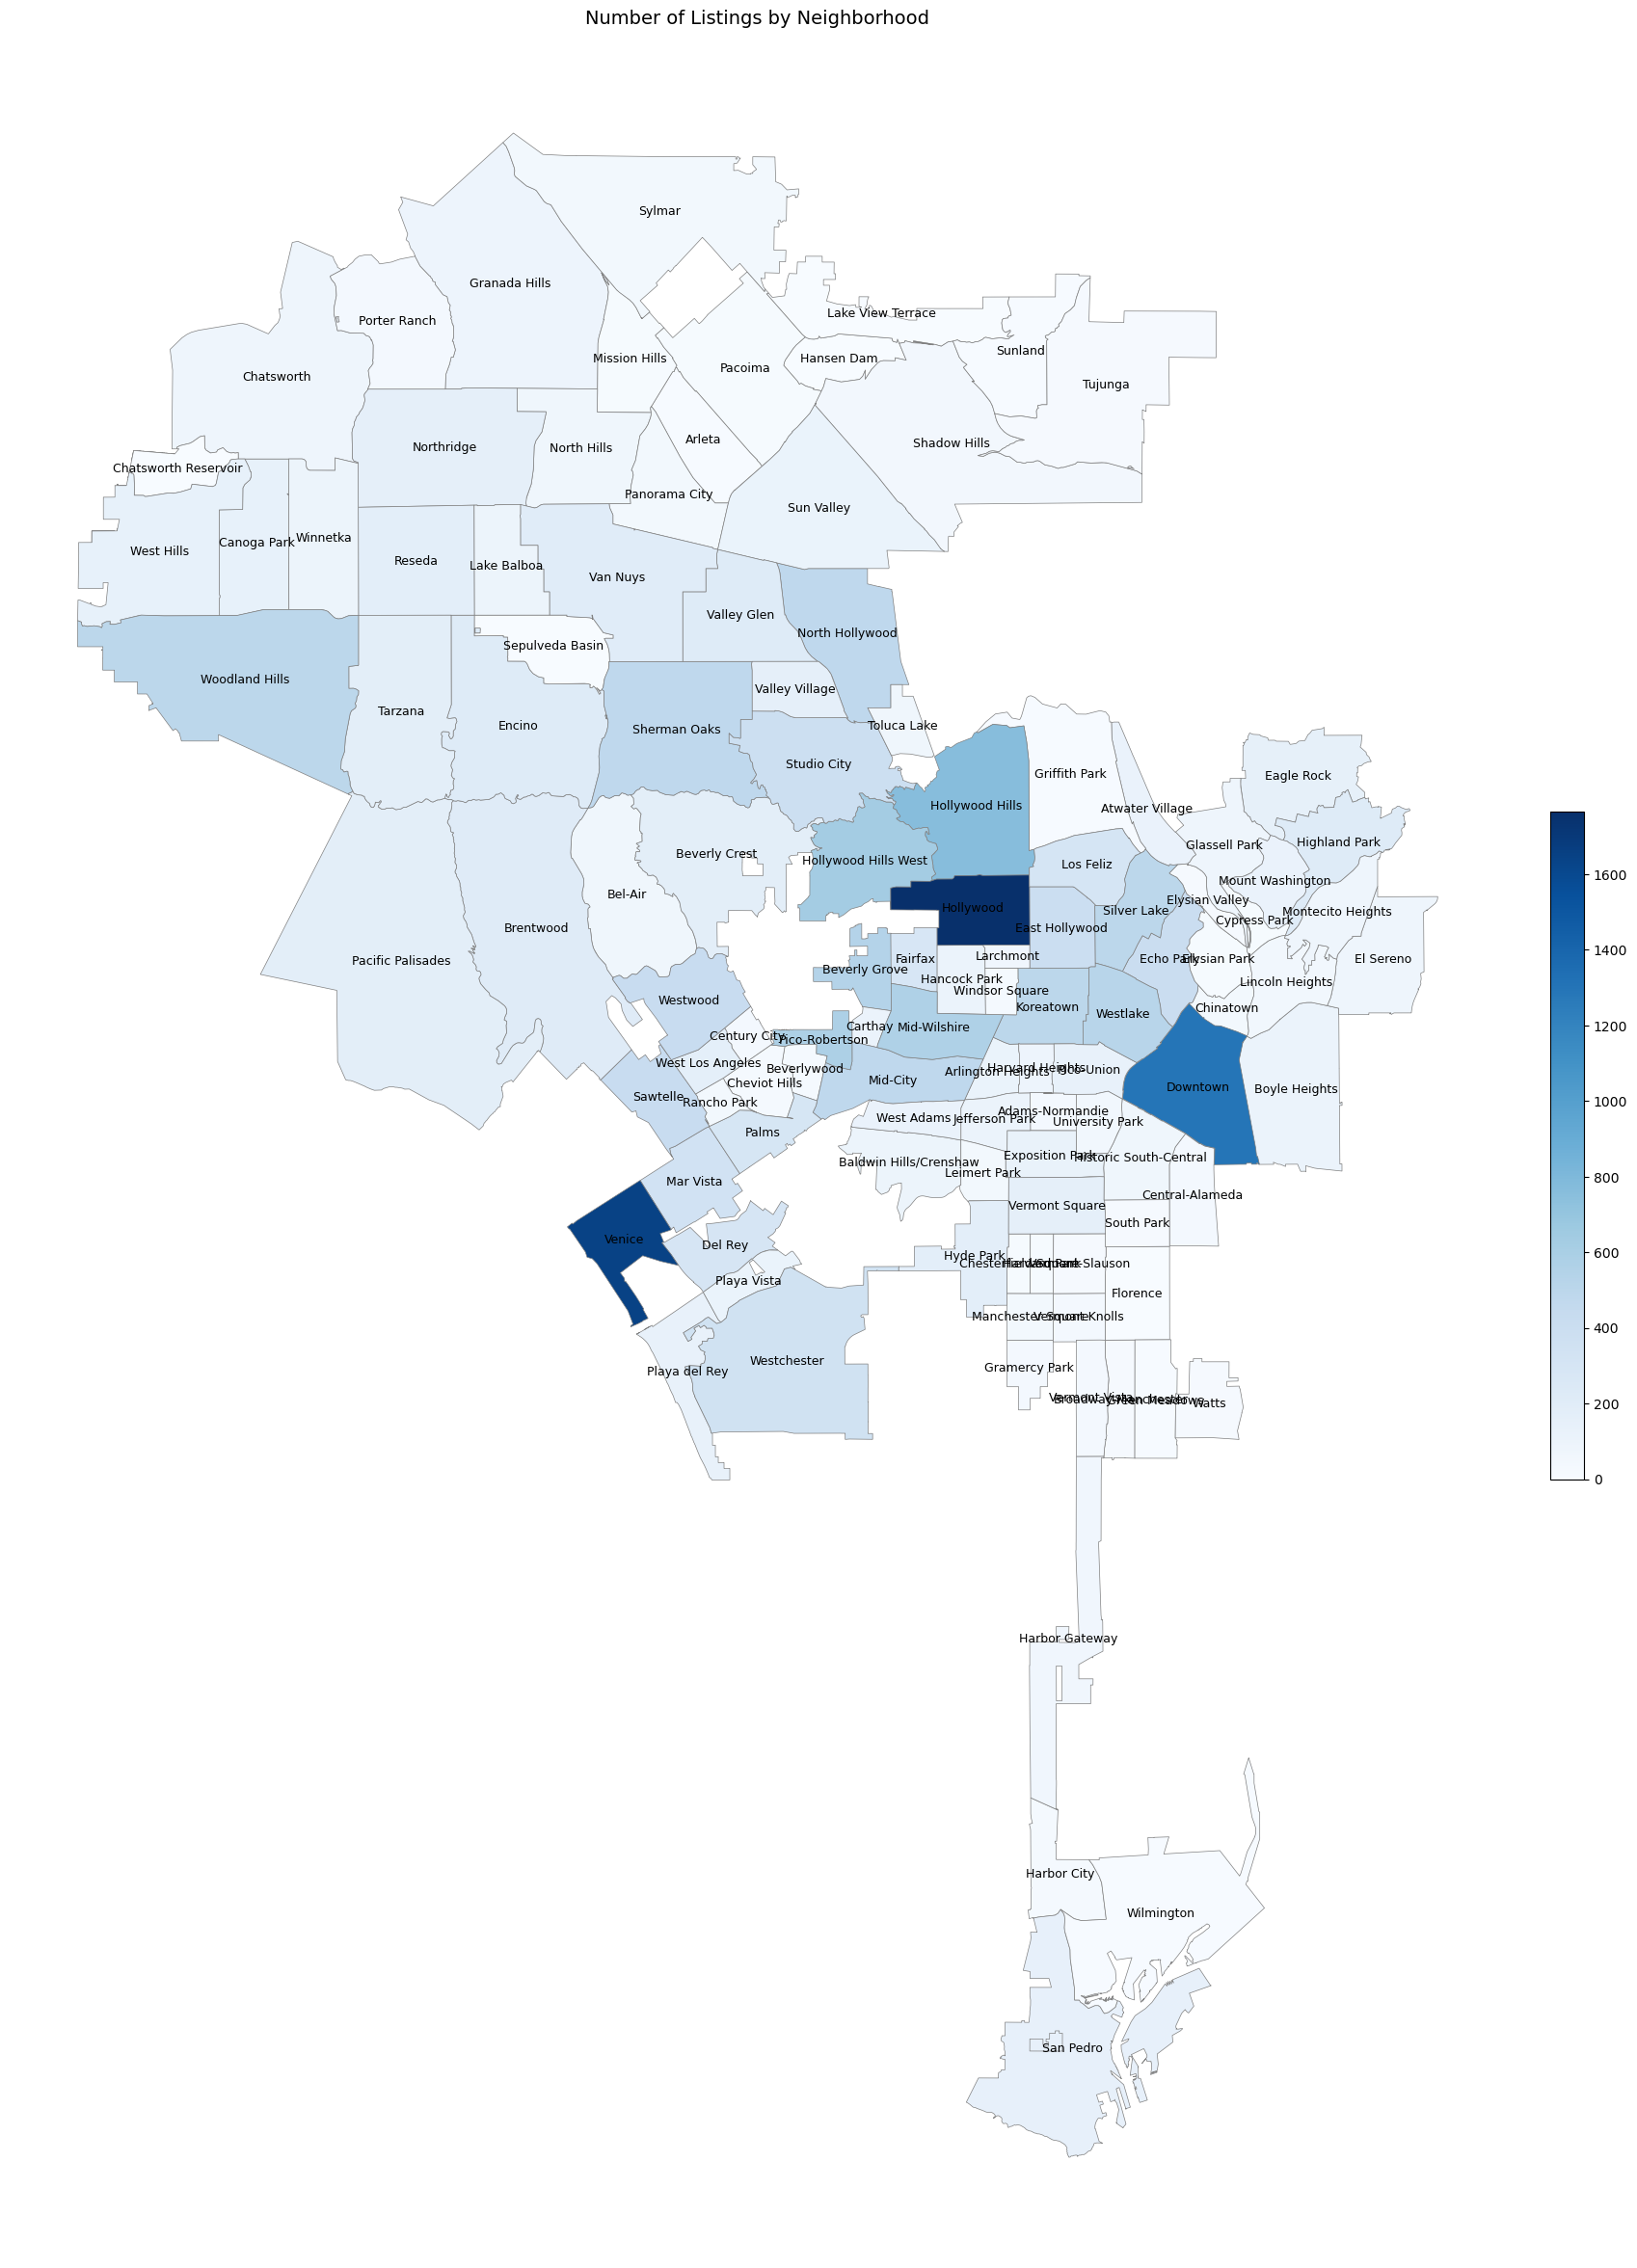

In [39]:
# merge
neigh_num = neigh_geo.merge(nei_listings, on='name', how='left')

# fill missing diff
neigh_num['count'] = neigh_num['count'].fillna(0)


norm = colors.Normalize(vmin=neigh_num['count'].min(),
                        vmax=neigh_num['count'].max())


# plot
fig, ax = plt.subplots(figsize=(30,30))

neigh_num.plot(
    ax=ax,
    column='count',
    cmap='Blues',  
    norm=norm,     
    linewidth=0.5,
    edgecolor='gray',
    legend_kwds={'label': 'Number of Listings (2023Q3)'}
)
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap='Blues'),
    ax=ax,
    fraction=0.03,
    pad=0.02,
    shrink=0.3   
)

ax.set_title("Number of Listings by Neighborhood", fontsize=14)
ax.axis("off")
for idx, row in neigh_num.iterrows():
    geom = row.geometry
    if geom.is_empty:  
        continue

    centroid = geom.centroid
    x, y = centroid.x, centroid.y

    ax.text(
        x, y,
        row['name'],
        fontsize=9,      
        ha='center',
        va='center',
        color='black'
    )

plt.show()


#### (D) Neighborhoods with increasing demand

In [40]:
# list out host IDs by quarter and neighborhood
host_by_q_neigh = {
    (src, neigh): set(df['host_id'])
    for (src, neigh), df in listings_gz.groupby(['source', 'neighbourhood_cleansed'])
}

# get sorted list of quarters
quarters = sorted(listings_gz['source'].unique())

churn_rows = []

# calculate churn metrics for each neighborhood
neigh_list = listings_gz['neighbourhood_cleansed'].unique()

for neigh in neigh_list:
    for i in range(1, len(quarters)):
        prev_key = (quarters[i-1], neigh)
        curr_key = (quarters[i], neigh)

        prev_hosts = host_by_q_neigh.get(prev_key, set())
        curr_hosts = host_by_q_neigh.get(curr_key, set())
        
        new_hosts = len(curr_hosts - prev_hosts)
        exit_hosts = len(prev_hosts - curr_hosts)
        
        prev_n = len(prev_hosts)
        curr_n = len(curr_hosts)

        host_pct_change = ((curr_n - prev_n) / prev_n * 100) if prev_n > 0 else None
        new_host_ratio = (new_hosts / curr_n) if curr_n > 0 else None
        exit_host_ratio = (exit_hosts / prev_n) if prev_n > 0 else None

        churn_rows.append([
            quarters[i],
            neigh,
            new_hosts,
            exit_hosts,
            curr_n,
            host_pct_change,
            new_host_ratio,
            exit_host_ratio
        ])

# create dataframe
churn_neigh_df = pd.DataFrame(
    churn_rows,
    columns=[
        'quarter',
        'neighbourhood_cleansed',
        'new_hosts',
        'exit_hosts',
        'unique_hosts',
        'host_pct_change',
        'new_host_ratio',
        'exit_host_ratio'
    ]
)

churn_neigh_df.head()


,quarter,neighbourhood_cleansed,new_hosts,exit_hosts,unique_hosts,host_pct_change,new_host_ratio,exit_host_ratio
0,2023Q1,Culver City,43,24,325,6.209150,0.132308,0.078431
1,2023Q2,Culver City,45,27,343,5.538462,0.131195,0.083077
2,2023Q3,Culver City,41,26,358,4.373178,0.114525,0.075802
3,2023Q1,Hollywood Hills West,43,32,396,2.857143,0.108586,0.083117
4,2023Q2,Hollywood Hills West,35,27,404,2.020202,0.086634,0.068182


In [41]:
df = churn_neigh_df.copy()

# calculate prev_hosts
df['prev_hosts'] = df['unique_hosts'] - df['new_hosts'] + df['exit_hosts']

# calculate delta_hosts comparing to previous quarter
df['delta_hosts'] = df['unique_hosts'] - df['prev_hosts']

df['HGI'] = (df['new_hosts'] / df['prev_hosts'].replace(0, np.nan)) * np.log1p(df['prev_hosts'])
df['HGI'] = df['HGI'].fillna(0)

df['host_act_score'] = (
    0.4 * df['new_hosts'] +
    0.4 * df['delta_hosts'] +
    0.2 * df['HGI']
)

q323 = df[df['quarter'] == '2023Q3']


In [42]:
neigh_geo1 = neigh_geo.merge(q323[['neighbourhood_cleansed','quarter','host_act_score']], 
                            left_on='name', right_on='neighbourhood_cleansed', 
                            how='left')


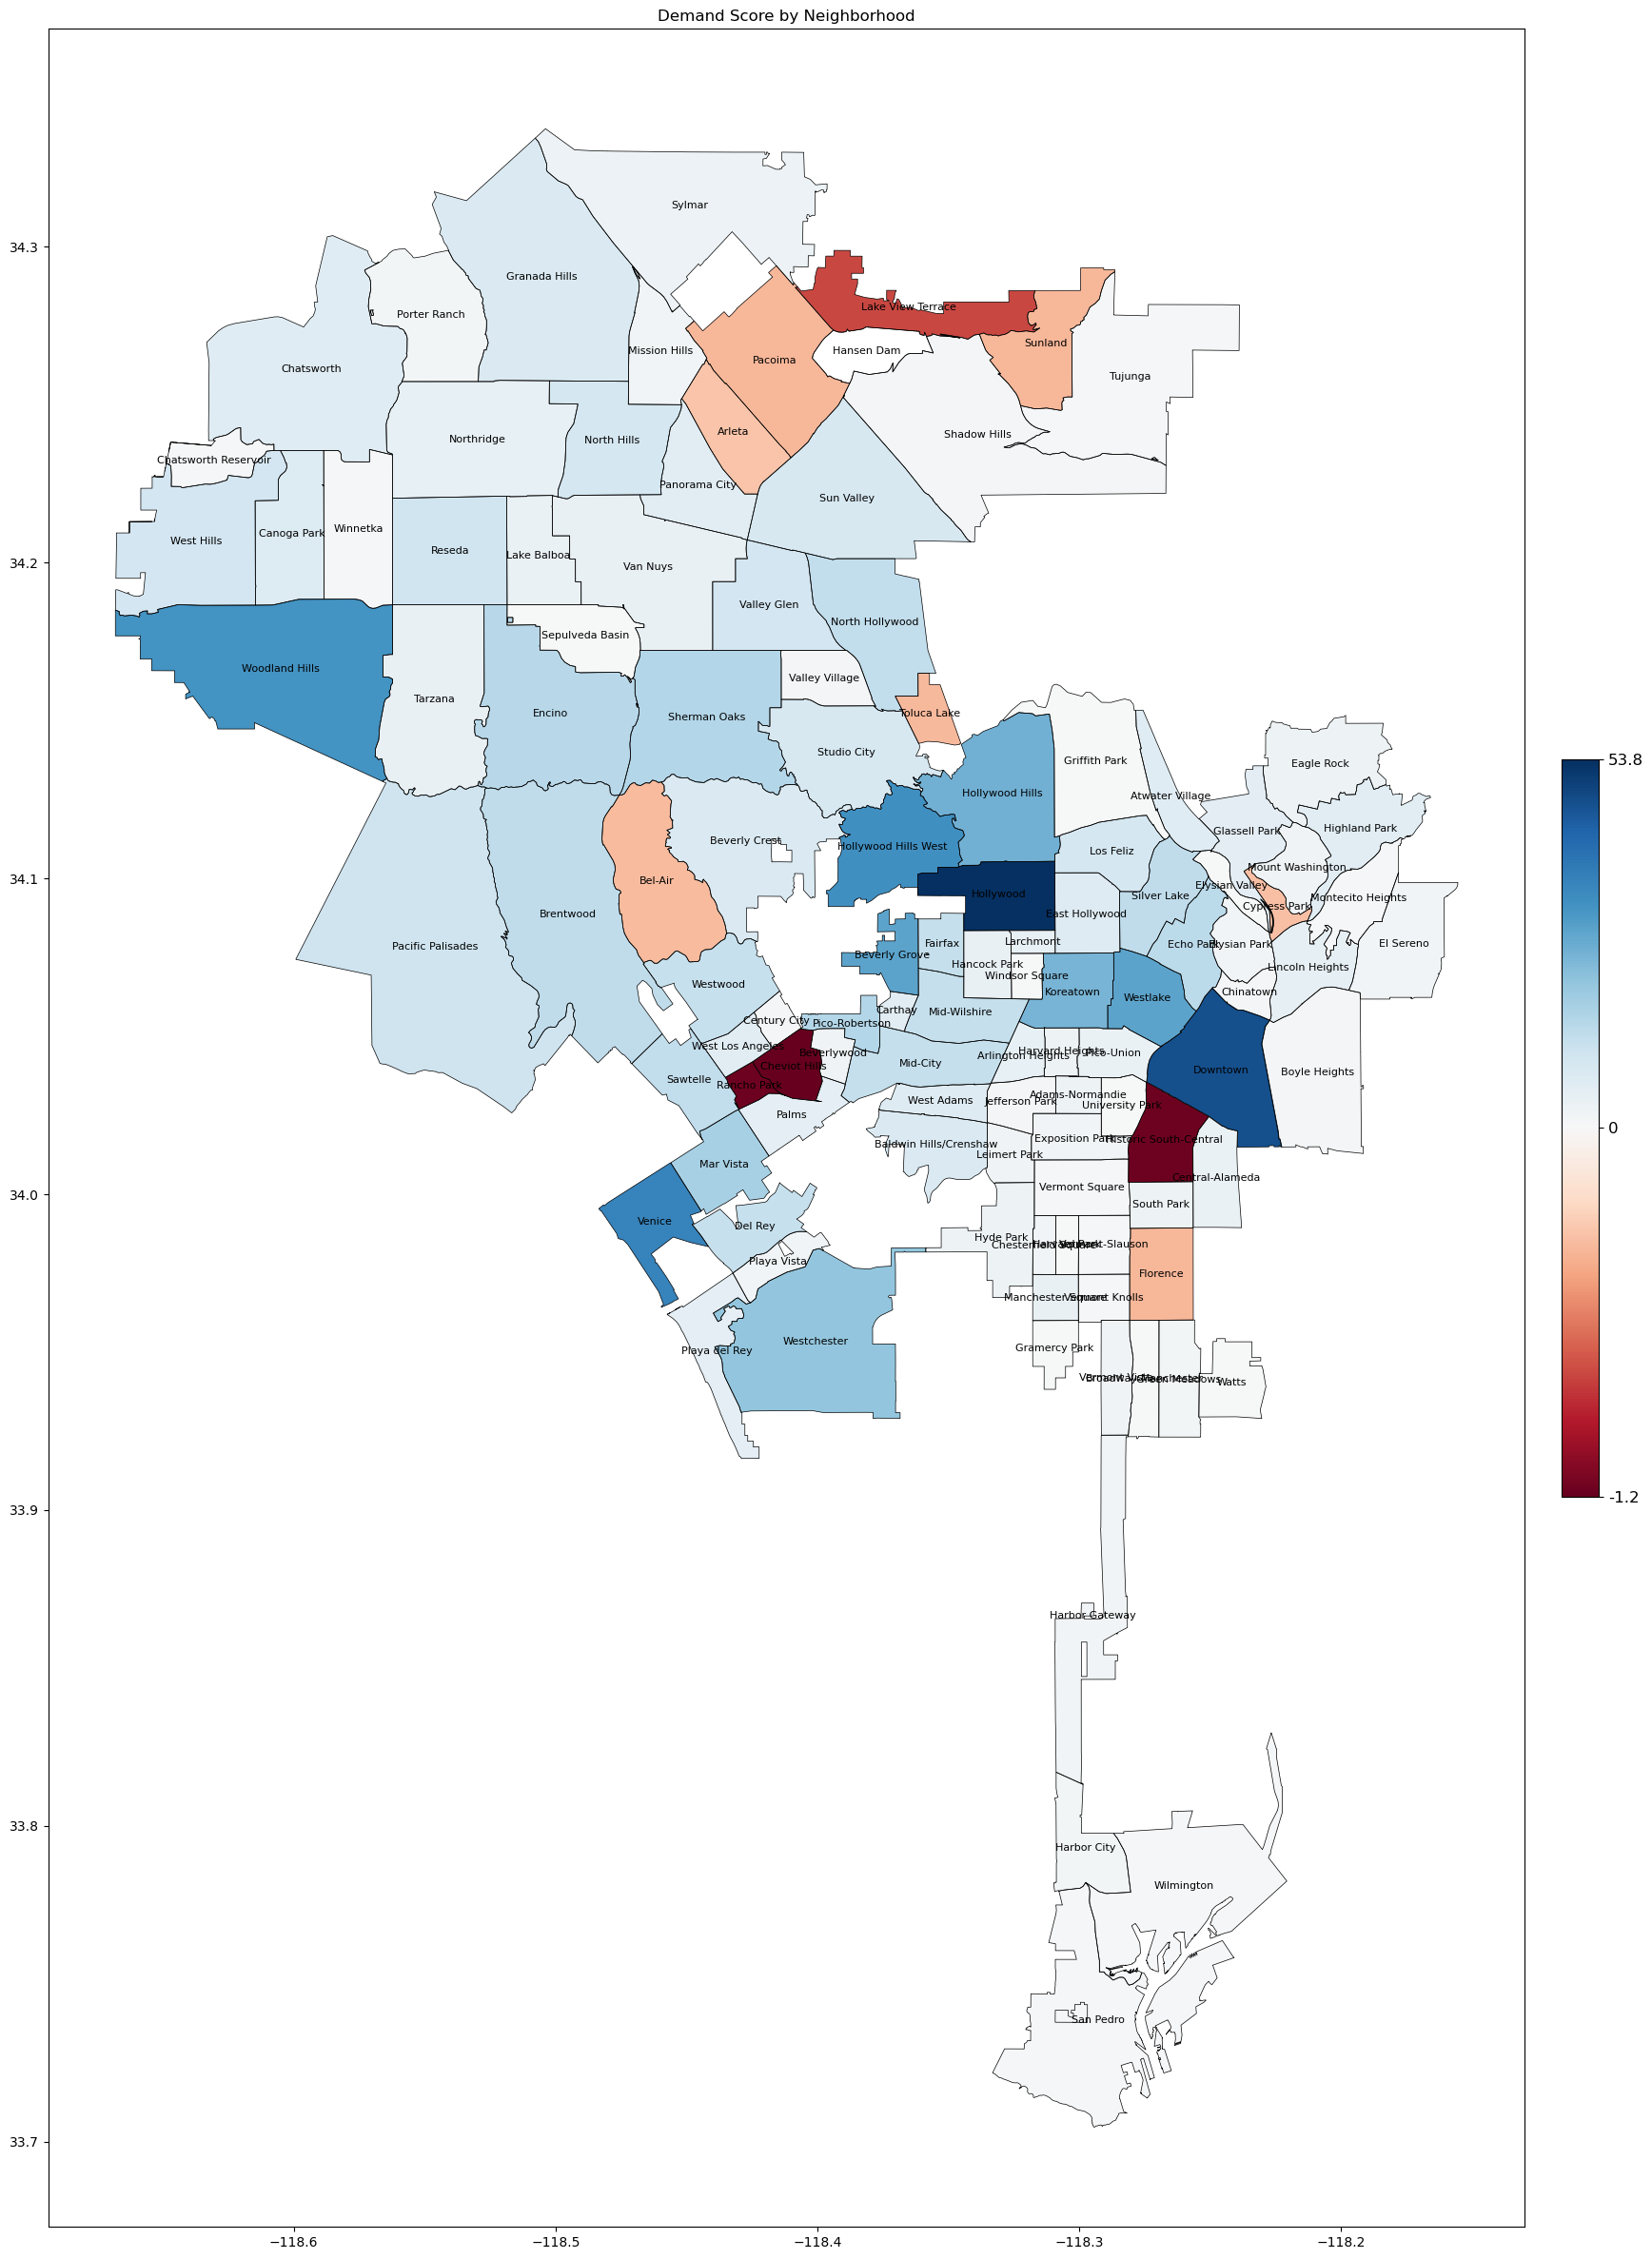

In [43]:
vmin = neigh_geo1['host_act_score'].min()
vmax = neigh_geo1['host_act_score'].max()

fig, ax = plt.subplots(figsize=(25, 30))

# Center colormap at 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Layer 1 — choropleth with correct midpoint
neigh_geo1.plot(
    column='host_act_score',
    cmap='RdBu',
    norm=norm,
    ax=ax,
    edgecolor='none'
)
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
cbar = fig.colorbar(
    sm,
    ax=ax,
    fraction=0.02,   
    pad=0.02,        
    shrink=0.8       
)
ticks = [vmin, 0, vmax]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{vmin:.1f}", "0", f"{vmax:.1f}"])

cbar.ax.tick_params(labelsize=12)

# Layer 2 — black boundaries
neigh_geo1.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.5
)

# Add labels
for idx, row in neigh_geo1.iterrows():
    centroid = row['geometry'].centroid
    ax.text(
        centroid.x,
        centroid.y,
        row['name'],
        fontsize=8,
        ha='center',
        va='center'
    )

plt.title("Demand Score by Neighborhood")
plt.show()
